In [1]:
# 📦 Importujemo potrebne biblioteke
import numpy as np
# 📦 Importujemo potrebne biblioteke
import pandas as pd
# 📦 Importujemo potrebne biblioteke
import matplotlib.pyplot as plt

## Genersanje podataka

Generisanje podataka (dve klase, normalne raspodele u 2-D prostoru). Varirati parametre normalnih raspodela za prikaz različitih slučajeva primene KNN.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


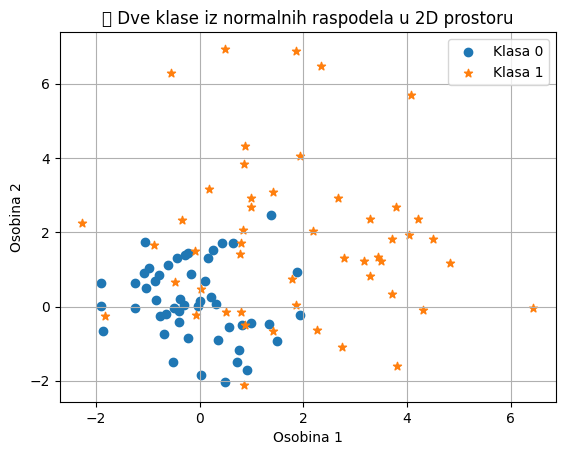

In [2]:
# 📦 Importujemo potrebne biblioteke
import numpy as np
# 📦 Importujemo potrebne biblioteke
import matplotlib.pyplot as plt

# 🔸 Generišemo podatke za klasu 0:
# 50 tačaka sa normalnom raspodelom sredine (0,0) i standardne devijacije 1
# 🎲 Generišemo podatke iz normalne raspodele
X_1 = np.random.normal(loc=0, scale=1, size=(50, 2))  # 50 uzoraka, 2D prostor

# 🔸 Generišemo podatke za klasu 1:
# 50 tačaka sa normalnom raspodelom sredine (2,2) i standardne devijacije 2
# 🎲 Generišemo podatke iz normalne raspodele
X_2 = np.random.normal(loc=2, scale=2, size=(50, 2))  # veća raspršenost

# 🔹 Spajamo oba skupa u jedan X (ukupno 100 uzoraka, svaki sa 2 feature-a)
# 🔗 Spajamo generisane podatke u jedan skup
X = np.concatenate((X_1, X_2), axis=0)

# 🔹 Kreiramo pripadajuće labele:
# prvih 50 uzoraka imaju labelu 0 (klasa 0), drugih 50 imaju 1 (klasa 1)
# 🔗 Spajamo generisane podatke u jedan skup
Y = np.concatenate((np.zeros((50, 1)), np.ones((50, 1))), axis=0)

# 🔸 Vizualizacija podataka
# Prvih 50 tačaka (klasa 0) – crta se kružićima
# 📊 Prikazujemo podatke na scatter plot-u
plt.scatter(X[:50, 0], X[:50, 1], label='Klasa 0', marker='o')

# Sledećih 50 tačaka (klasa 1) – crta se zvezdicama
# 📊 Prikazujemo podatke na scatter plot-u
plt.scatter(X[50:, 0], X[50:, 1], label='Klasa 1', marker='*')

# Dodajemo legendu da se zna koja boja/marker kojoj klasi pripada
# 🏷️ Dodajemo legendu
plt.legend()

# Prikazujemo graf
plt.title("🎯 Dve klase iz normalnih raspodela u 2D prostoru")
plt.xlabel("Osobina 1")
plt.ylabel("Osobina 2")
plt.grid(True)
plt.show()


In [3]:
# 🔀 Delimo podatke na trening i test skup
from sklearn.model_selection import train_test_split
# 🔀 Delimo podatke na trening i test skup
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=10, stratify=Y)

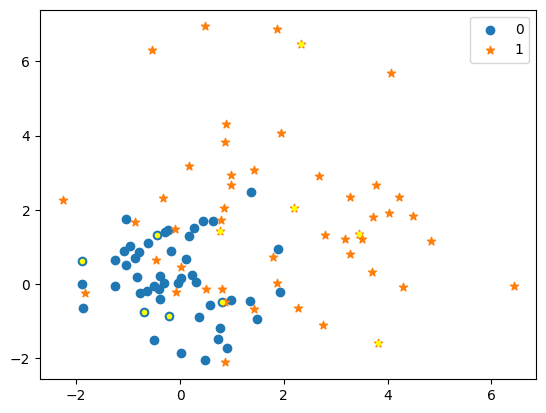

In [4]:
# 📊 Prikazujemo podatke na scatter plot-u
plt.scatter(X[:50,0], X[:50,1], label='0', marker='o')
# 📊 Prikazujemo podatke na scatter plot-u
plt.scatter(X[50:,0], X[50:,1], label='1', marker='*')
# 📊 Prikazujemo podatke na scatter plot-u
plt.scatter(X_test[:,0], X_test[:,1], marker='.', c='yellow') #zutim su oznaceni test uzorci
# 🏷️ Dodajemo legendu
plt.legend()

Primena KNN algoritma na generisanim podacima i poređenje pravih i dobijenih labela (oznaka klase).

In [5]:
# 🧠 Inicijalizujemo KNN klasifikator
from sklearn.neighbors import KNeighborsClassifier

# inicijalizacija i obuka klasifikatora
# 🧠 Inicijalizujemo KNN klasifikator
classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
# 🚂 Obučavamo KNN klasifikator
classifier.fit(X_train, Y_train)

# n_neighbors (default 5)
# weights (uniform, distance or user-defined)
# p (default 2, meaning euclidean, 1 would be manhattan)
# metric (default minkowski, sklearn.neighbors.DistanceMetric (euclidean, manhattan, chebyshev, minkowski, hamming(int), jaccard, dice))
# metric_params

# testiranje
# 🔮 Predviđamo klase za test skup
Y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Vizualizacija dobijenih rezultata. Pogrešno klasifikovani uzorci imaće tačku suprotne boje.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


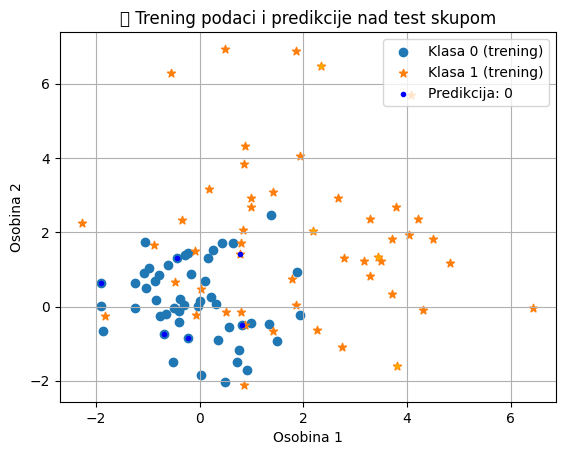

In [6]:
# 🔹 Prikazujemo podatke iz klase 0 (prvih 50 uzoraka)
# Koristimo marker 'o' i podrazumevanu boju
# 📊 Prikazujemo podatke na scatter plot-u
plt.scatter(X[:50, 0], X[:50, 1], label='Klasa 0 (trening)', marker='o')

# 🔹 Prikazujemo podatke iz klase 1 (uzorci 50-99)
# Koristimo marker '*' da bi ih razlikovali
# 📊 Prikazujemo podatke na scatter plot-u
plt.scatter(X[50:, 0], X[50:, 1], label='Klasa 1 (trening)', marker='*')

# 🔸 Iteriramo kroz sve test primere
# 🔁 Iteriramo kroz test primere
for i in range(len(X_test)):
    # Ako je predikcija za test primer klasa 0 (plavo)
    if Y_pred[i] == 0:
# 📊 Prikazujemo podatke na scatter plot-u
        plt.scatter(X_test[i, 0], X_test[i, 1], marker='.', c='blue', label='Predikcija: 0' if i == 0 else "")

    # Ako je predikcija za test primer klasa 1 (narandžasto)
    elif Y_pred[i] == 1:
# 📊 Prikazujemo podatke na scatter plot-u
        plt.scatter(X_test[i, 0], X_test[i, 1], marker='.', c='orange', label='Predikcija: 1' if i == 0 else "")

# 🔹 Prikaz legende
# 🏷️ Dodajemo legendu
plt.legend()

# ✅ (Opcionalno) dodatne stvari za bolji prikaz
plt.title("📊 Trening podaci i predikcije nad test skupom")
plt.xlabel("Osobina 1")
plt.ylabel("Osobina 2")
plt.grid(True)
plt.show()


Matrica konfuzije (kolone su predviđene, a vrste su prave klase).

In [7]:
# negativ je klasa 0, a pozitiv klasa 1
TN=0
FP=0
FN=0
TP=0

# 🔁 Iteriramo kroz test primere
for i in range(len(Y_pred)):
  if Y_pred[i]==0 and Y_test[i]==0:
    TN = TN+1
  elif Y_pred[i]==1 and Y_test[i]==0:
    FP = FP+1
  elif Y_pred[i]==0 and Y_test[i]==1:
    FN = FN+1
  elif Y_pred[i]==1 and Y_test[i]==1:
    TP = TP+1

conf_mat = pd.DataFrame(columns=['0','1'], index=['0','1'])
conf_mat.iloc[0,0]=TN
conf_mat.iloc[0,1]=FP
conf_mat.iloc[1,0]=FN
conf_mat.iloc[1,1]=TP

conf_mat

,0,1
0,5,0
1,1,4


In [8]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, Y_pred) # TN, FP
print(conf_mat)                             # FN, TP

[[5 0]
 [1 4]]


Mere uspešnosti klasifikatora.

*   $ precision = \frac{TP}{TP+FP} $
*   $ accuracy = \frac{TP+TN}{TP+TN+FP+FN} $
*   $ sensitivity = \frac{TP}{TP+FN} $
*   $ specificity = \frac{TN}{TN+FP} $
*   $ F\_score = \frac{2*precision*sensitivity}{precision+sensitivity} $



In [9]:
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
F_score = 2*precision*sensitivity/(precision+sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('specificity: ', specificity)
print('F score: ', F_score)

precision:  1.0
accuracy:  0.9
sensitivity/recall:  0.8
specificity:  1.0
F score:  0.888888888888889


# Zadatak 1

Implementirati algoritam za klasifikaciju ispitanika na one koji se izjašnjavaju kao srećni i one koji se ne izjašnjavaju kao srećni. Koristiti bazu podataka koja sadrži rezultate ankete od 143 osobe. U anketi se postavlja 6 pitanja u kojima se proverava koliko je anketirana osoba na skali od 1 do 5 zadovoljna sa: dostupnošću informacija o gradskim službama, visinom troškova stanovanja, kvalitetom državnog školstva, poverenjem u lokalnu policiju, održavanjem ulica i trotoara, i dostupnošću društvenih događaja. Odgovori anketirane osobe su obeležja za tu osobu i svaka osoba rekla je da li je srećna ili nije, a taj odgovor predstavlja klasnu labelu.

In [10]:
# 📦 Importujemo potrebne biblioteke
import numpy as np
# 📦 Importujemo potrebne biblioteke
import matplotlib.pyplot as plt
# 📦 Importujemo potrebne biblioteke
import pandas as pd

In [11]:
# Read dataset to pandas dataframe
!gdown 18LShd5kJch5nxHbHxYkkI_qRlrQ60WmL

Downloading...
From: https://drive.google.com/uc?id=18LShd5kJch5nxHbHxYkkI_qRlrQ60WmL
To: /content/SomervilleHappinessSurvey2015.csv
100% 4.33k/4.33k [00:00<00:00, 12.0MB/s]


Učitati podatke u DataFrame. Koliko ima uzoraka? Koliko ima obeležja i kog su tipa?

In [12]:
cols = ['class', 'services', 'cost', 'schools', 'police', 'streets', 'events']
dataset = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding = "utf-16")
dataset.columns = cols
print(dataset.shape)
dataset.head()

(143, 7)


,class,services,cost,schools,police,streets,events
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [13]:
X = dataset.iloc[:, 1:] #obeležja
y = dataset.iloc[:, 0] #labele


Proveriti koliko uzoraka ima u kojoj klasi, kao i da li ima nedostajućih vrednosti.

In [14]:
print("broj uzoraka u klasi 1 je: ", sum(y==1))
print("broj uzoraka u klasi 0 je: ", sum(y==0))
print("broj nedostajućih podataka je: ", X.isnull().sum().sum())

broj uzoraka u klasi 1 je:  77
broj uzoraka u klasi 0 je:  66
broj nedostajućih podataka je:  0


# 📏 METRIKE UDALJENOSTI U KNN KLASIFIKATORU

"""
1. Euclidean (L2 norm) — metrika rastojanja u euklidskom prostoru
   📌 Formula: sqrt((x1 - y1)^2 + (x2 - y2)^2 + ...)
   ✅ Kada koristiti:
     - Kontinuirane numeričke promenljive (npr. temperatura, visina, brzina...)
     - Podaci su skalirani (npr. standardizovani ili normalizovani)

2. Manhattan (L1 norm, taxicab) — zbir apsolutnih razlika po dimenzijama
   📌 Formula: |x1 - y1| + |x2 - y2| + ...
   ✅ Kada koristiti:
     - Kontinuirani podaci
     - Robusnije na outliere od Euklidske distance

3. Minkowski — generalizacija Euklidske i Manhattan distance
   📌 Formula: (∑ |xi - yi|^p)^(1/p)
   ✅ Kada koristiti:
     - Podesivo (p=1 → Manhattan, p=2 → Euklidska)

4. Hamming — broj različitih pozicija između vektora
   📌 Formula: broj pozicija na kojima se vrednosti razlikuju
   ✅ Kada koristiti:
     - Binarni ili kategorički podaci (nakon one-hot enkodiranja)
     - Idealno za stringove i boolean nizove

5. Cosine — sličnost po pravcu, ne po udaljenosti
   📌 Formula: 1 - cos(ugao između vektora)
   ✅ Kada koristiti:
     - Tekstualni podaci, sparse vektori (npr. TF-IDF)
     - Kada ti je važna orijentacija vektora, a ne njihova dužina

🧠 Napomena:
U većini numeričkih datasetova koristi se 'euclidean' (default). Ako podaci nisu numerički, koristi se 'hamming' za binarne/kategoričke, ili 'cosine' za tekstualne/sparse.

"""


## Trostruka podela skupa

In [15]:
# 🔀 Delimo podatke na trening i test skup
from sklearn.model_selection import train_test_split

# podela podataka na trening i test
# 🔀 Delimo podatke na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)

# podela trening skupa na trening i validacioni
# 🔀 Delimo podatke na trening i test skup
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=10, stratify=y_test)

In [16]:
from sklearn import metrics

# inicijalizacija i obuka klasifikatora
# 🧠 Inicijalizujemo KNN klasifikator
classifier = KNeighborsClassifier(n_neighbors=11, metric='hamming')
# 🚂 Obučavamo KNN klasifikator
classifier.fit(X_train, y_train)

# validacija
# 🔮 Predviđamo klase za test skup
y_pred = classifier.predict(X_val)
# ✅ Računamo tačnost modela (accuracy)
accuracy = metrics.accuracy_score(y_val, y_pred)
print(accuracy)

0.7333333333333333


In [17]:
# korigovanje hiperparametara i validacija
# 🧠 Inicijalizujemo KNN klasifikator
classifier = KNeighborsClassifier(n_neighbors=3, metric='hamming')
# 🚂 Obučavamo KNN klasifikator
classifier.fit(X_train, y_train)

# 🔮 Predviđamo klase za test skup
y_pred = classifier.predict(X_val)
# ✅ Računamo tačnost modela (accuracy)
accuracy = metrics.accuracy_score(y_val, y_pred)
print(accuracy)


0.4666666666666667


Text(0, 0.5, 'tacnost')

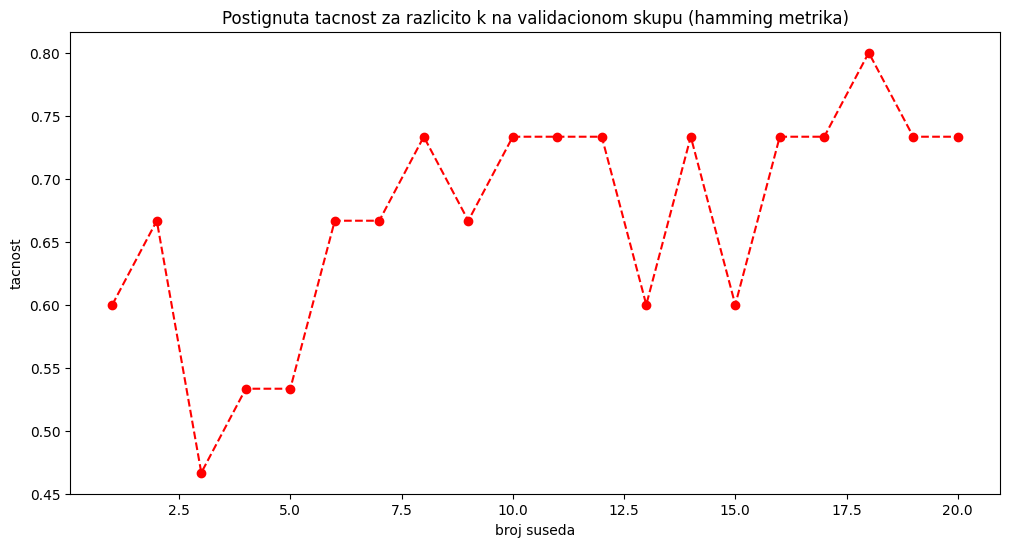

In [18]:
acc = []
# Racunanje greske za razlicito k, hamming metrika
# 🔁 Iteriramo kroz test primere
for i in range(1, 21):
# 🧠 Inicijalizujemo KNN klasifikator
    classifier = KNeighborsClassifier(n_neighbors=i, metric='hamming')
# 🚂 Obučavamo KNN klasifikator
    classifier.fit(X_train, y_train)
# 🔮 Predviđamo klase za test skup
    y_pred = classifier.predict(X_val)
# ✅ Računamo tačnost modela (accuracy)
    acc.append(metrics.accuracy_score(y_val, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), acc, color='red', linestyle='dashed', marker='o')
plt.title('Postignuta tacnost za razlicito k na validacionom skupu (hamming metrika)')
plt.xlabel('broj suseda')
plt.ylabel('tacnost')

Text(0, 0.5, 'tacnost')

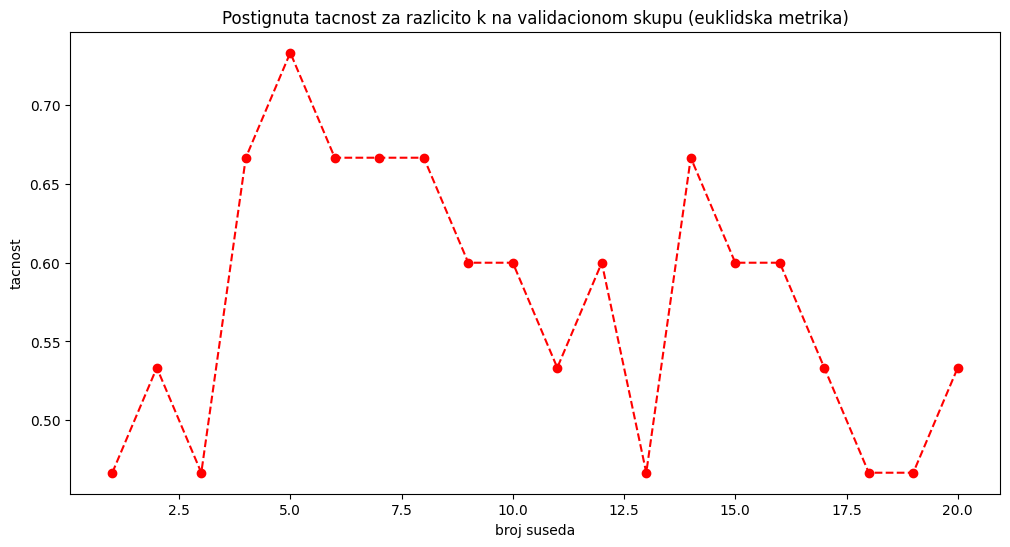

In [19]:
acc = []
# Racunanje greske za razlicito k (euklidska metrika)
# 🔁 Iteriramo kroz test primere
for i in range(1, 21):
# 🧠 Inicijalizujemo KNN klasifikator
    classifier = KNeighborsClassifier(n_neighbors=i, metric='braycurtis')
# 🚂 Obučavamo KNN klasifikator
    classifier.fit(X_train, y_train)
# 🔮 Predviđamo klase za test skup
    y_pred = classifier.predict(X_val)
# ✅ Računamo tačnost modela (accuracy)
    acc.append(metrics.accuracy_score(y_val, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), acc, color='red', linestyle='dashed', marker='o')
plt.title('Postignuta tacnost za razlicito k na validacionom skupu (euklidska metrika)')
plt.xlabel('broj suseda')
plt.ylabel('tacnost')

In [20]:
# obuka konacnog modela
# 🧠 Inicijalizujemo KNN klasifikator
classifier = KNeighborsClassifier(n_neighbors=18, metric='hamming')
# 🚂 Obučavamo KNN klasifikator
classifier.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0)) #classifier.fit(X_train1, y_train1)

# testiranje
# 🔮 Predviđamo klase za test skup
y_pred = classifier.predict(X_test)
# 🔁 Iteriramo kroz test primere
for i,j in zip(y_pred, y_test):
  print(i,j)

1 0
0 0
1 1
0 1
0 0
1 0
0 1
1 1
1 1
1 1
1 1
1 0
1 1
1 0


In [21]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred) # TN, FP
print(conf_mat)                             # FN, TP

[[2 4]
 [2 6]]


In [22]:
precision = metrics.precision_score(y_test, y_pred)
# ✅ Računamo tačnost modela (accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
f_score = metrics.f1_score(y_test, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.6
accuracy:  0.5714285714285714
sensitivity/recall:  0.75
F score:  0.6666666666666666


In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.60      0.75      0.67         8

    accuracy                           0.57        14
   macro avg       0.55      0.54      0.53        14
weighted avg       0.56      0.57      0.55        14

